# Week 2 — Multiple Linear Regression

_File: 02-multiple-linear-regression.ipynb_

Implementation of multiple linear regression concepts from Andrew Ng's Supervised ML course.
This notebook covers vectorization, feature scaling, gradient descent, and polynomial regression with practical examples.

## Multiple Features and Vectorization

Model: y_hat = w·x + b. Vectorization provides computational efficiency and code clarity.

In [1]:
import numpy as np

def predict(w: np.ndarray, b: float, X: np.ndarray) -> np.ndarray:
    """Vectorized predictions for linear regression."""
    return X @ w + b

# Test with sample data
X_demo = np.array([[1200, 3, 2], [900, 2, 1]], dtype=float)
w_demo = np.array([0.2, 15.0, 10.0])
b_demo = 50.0
predict(w_demo, b_demo, X_demo)

array([355., 270.])

## Cost Function and Gradients (Vectorized)

Cost: J(w,b) = (1/(2m)) \* sum((y_hat - y)^2). Gradients: dJ/dw = (1/m) X^T (Xw + b - y), dJ/db = (1/m) sum(y_hat - y).

In [2]:
def compute_cost(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray) -> float:
    m = X.shape[0]
    errs = X @ w + b - y
    return float((errs @ errs) / (2.0 * m))

def compute_gradient(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray):
    m = X.shape[0]
    errs = X @ w + b - y
    grad_w = (X.T @ errs) / m
    grad_b = float(np.sum(errs) / m)
    return grad_w, grad_b

## Gradient Descent and Feature Scaling

Implementation uses Z-score normalization and includes an optional convergence tolerance parameter.

In [3]:
def standardize(X: np.ndarray):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=0)
    sigma = np.where(sigma == 0, 1.0, sigma)
    return (X - mu) / sigma, mu, sigma

def gradient_descent(X, y, alpha=0.1, iters=800, use_standardize=True, tol=None):
    if use_standardize:
        Xs, mu, sigma = standardize(X)
    else:
        Xs, mu, sigma = X.copy(), np.zeros(X.shape[1]), np.ones(X.shape[1])
    m, n = Xs.shape
    w = np.zeros(n)
    b = 0.0
    J_hist = []
    for t in range(iters):
        gw, gb = compute_gradient(w, b, Xs, y)
        w -= alpha * gw
        b -= alpha * gb
        J = compute_cost(w, b, Xs, y)
        J_hist.append(J)
        if tol is not None and t > 0 and abs(J_hist[-2] - J_hist[-1]) < tol:
            break
    return {'w': w, 'b': b, 'J_hist': J_hist, 'mu': mu, 'sigma': sigma, 'standardized': use_standardize}

# Synthetic dataset (housing features)
rng = np.random.default_rng(42)
m = 400
sqft   = rng.uniform(400, 3000, size=m)
beds   = rng.integers(1, 6, size=m)
age    = rng.uniform(0, 60, size=m)
floors = rng.integers(1, 3, size=m)
X = np.column_stack([sqft, beds, age, floors]).astype(float)
true_w = np.array([0.18, 12.0, -0.9, 8.0])
true_b = 40.0
noise = rng.normal(0, 25, size=m)
y = X @ true_w + true_b + noise
model = gradient_descent(X, y, alpha=0.1, iters=800, use_standardize=True, tol=1e-8)
(len(model['J_hist']), model['J_hist'][-1])

(135, 347.8914313743816)

### Learning Curves

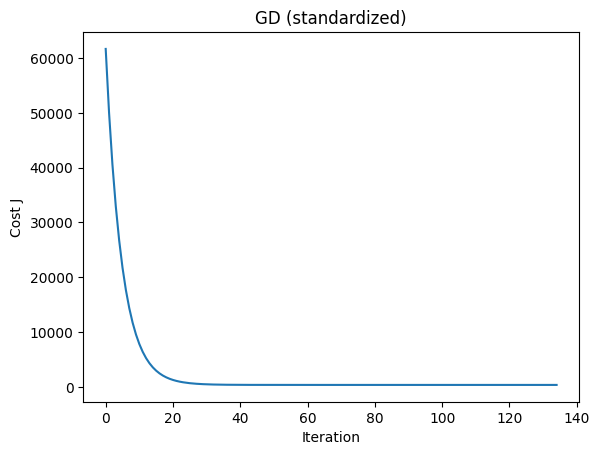

/var/folders/tl/4qfn0s2j10b9l4wpdgrcz9180000gn/T/ipykernel_54367/2782917022.py:4: RuntimeWarning: overflow encountered in matmul
  return float((errs @ errs) / (2.0 * m))
/var/folders/tl/4qfn0s2j10b9l4wpdgrcz9180000gn/T/ipykernel_54367/2782917022.py:9: RuntimeWarning: overflow encountered in matmul
  grad_w = (X.T @ errs) / m
/var/folders/tl/4qfn0s2j10b9l4wpdgrcz9180000gn/T/ipykernel_54367/2720374221.py:18: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * gw


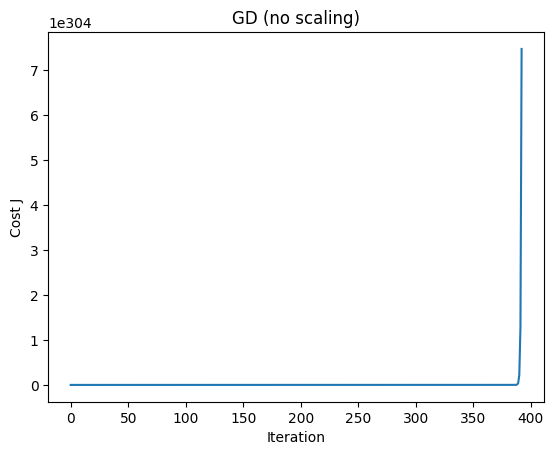

In [4]:
import matplotlib.pyplot as plt
plt.figure(); plt.plot(model['J_hist']); plt.xlabel('Iteration'); plt.ylabel('Cost J'); plt.title('GD (standardized)'); plt.show()
model_noscale = gradient_descent(X, y, alpha=1e-6, iters=800, use_standardize=False)
plt.figure(); plt.plot(model_noscale['J_hist']); plt.xlabel('Iteration'); plt.ylabel('Cost J'); plt.title('GD (no scaling)'); plt.show()

## Learning Rate Analysis

Testing different learning rates spaced approximately 3x apart to observe convergence behavior.

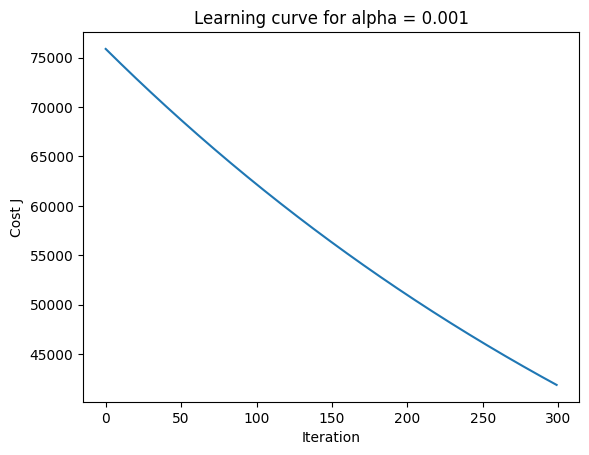

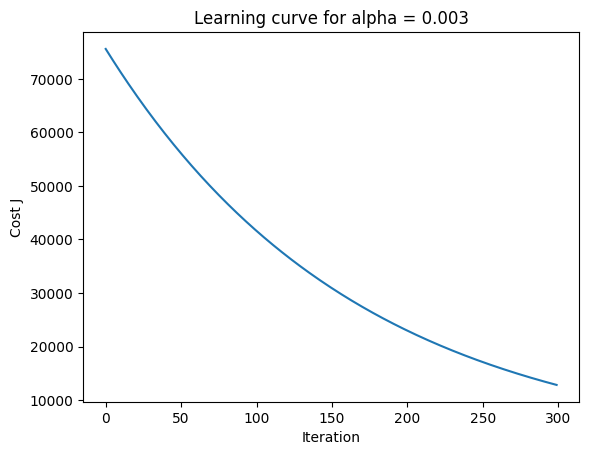

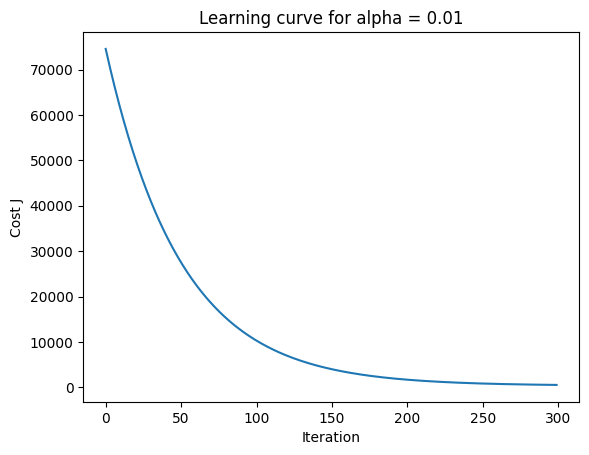

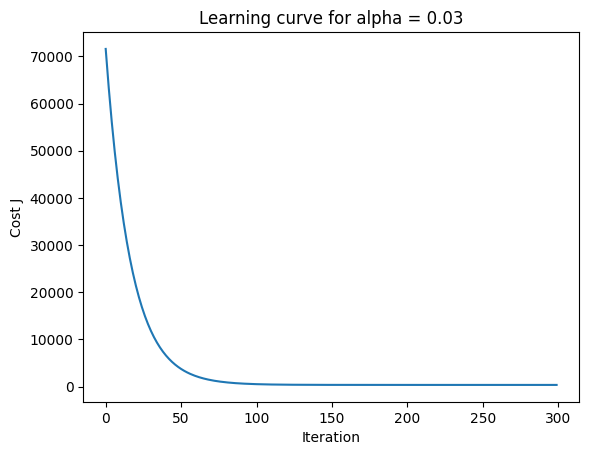

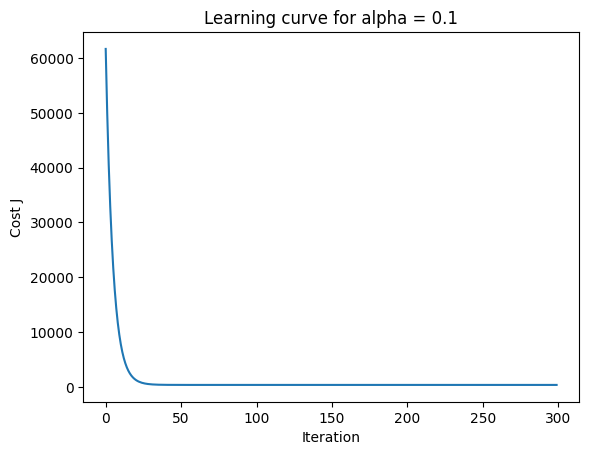

In [5]:
alphas = [1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
for a in alphas:
    out = gradient_descent(X, y, alpha=a, iters=300, use_standardize=True)
    plt.figure(); plt.plot(out['J_hist']); plt.xlabel('Iteration'); plt.ylabel('Cost J'); plt.title(f'Learning curve for alpha = {a}'); plt.show()

## Convergence Analysis

Implementation includes epsilon-based early stopping and confirms cost decreases monotonically with appropriate learning rates.

In [6]:
out_tol = gradient_descent(X, y, alpha=0.05, iters=5000, use_standardize=True, tol=1e-10)
(len(out_tol['J_hist']), out_tol['J_hist'][-1], out_tol['J_hist'][0])

(314, 347.89143133733495, 68661.29836446281)

## Polynomial Features

Demonstrates polynomial regression using [x, x^2, x^3] features. Feature scaling becomes critical with polynomial terms.

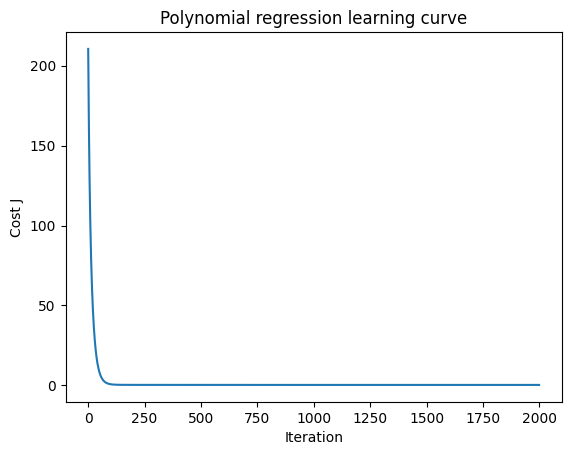

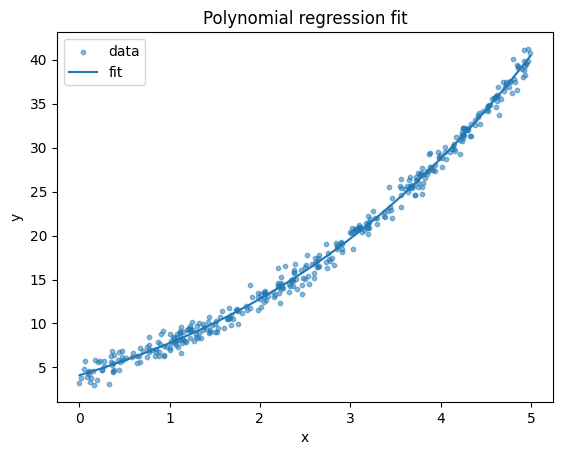

In [7]:
x1 = rng.uniform(0, 5, size=m)
y_curve = 4 + 3*x1 + 0.6*(x1**2) + 0.05*(x1**3) + rng.normal(0, 0.8, size=m)
X_poly = np.column_stack([x1, x1**2, x1**3])
poly_model = gradient_descent(X_poly, y_curve, alpha=0.03, iters=2000, use_standardize=True)
plt.figure(); plt.plot(poly_model['J_hist']); plt.xlabel('Iteration'); plt.ylabel('Cost J'); plt.title('Polynomial regression learning curve'); plt.show()
grid = np.linspace(x1.min(), x1.max(), 200)
Xg = np.column_stack([grid, grid**2, grid**3])
Xg_z = (Xg - poly_model['mu']) / poly_model['sigma']
yhat = Xg_z @ poly_model['w'] + poly_model['b']
plt.figure(); plt.scatter(x1, y_curve, s=10, alpha=0.5, label='data'); plt.plot(grid, yhat, label='fit'); plt.xlabel('x'); plt.ylabel('y'); plt.title('Polynomial regression fit'); plt.legend(); plt.show()

## Model Prediction

Important: Apply the same standardization (mu, sigma) used during training to new input data.

In [8]:
def transform_and_predict(model_dict, X_new):
    if model_dict.get('standardized', False):
        Xz = (X_new - model_dict['mu']) / model_dict['sigma']
    else:
        Xz = X_new
    return Xz @ model_dict['w'] + model_dict['b']
transform_and_predict(model, np.array([[1500,3,10,2],[2200,4,5,2]], dtype=float))

array([348.11744264, 491.26726127])

---

### Key Takeaways

- Prioritize vectorization for performance; use loops only for debugging
- Apply feature scaling when ranges differ significantly (essential for polynomial features)
- Cost function increases indicate learning rate issues or gradient sign errors
- Systematically test learning rates in 3x increments and monitor convergence curves
- Feature engineering often provides better results than increasing model complexity

_End of notebook._